In [51]:
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


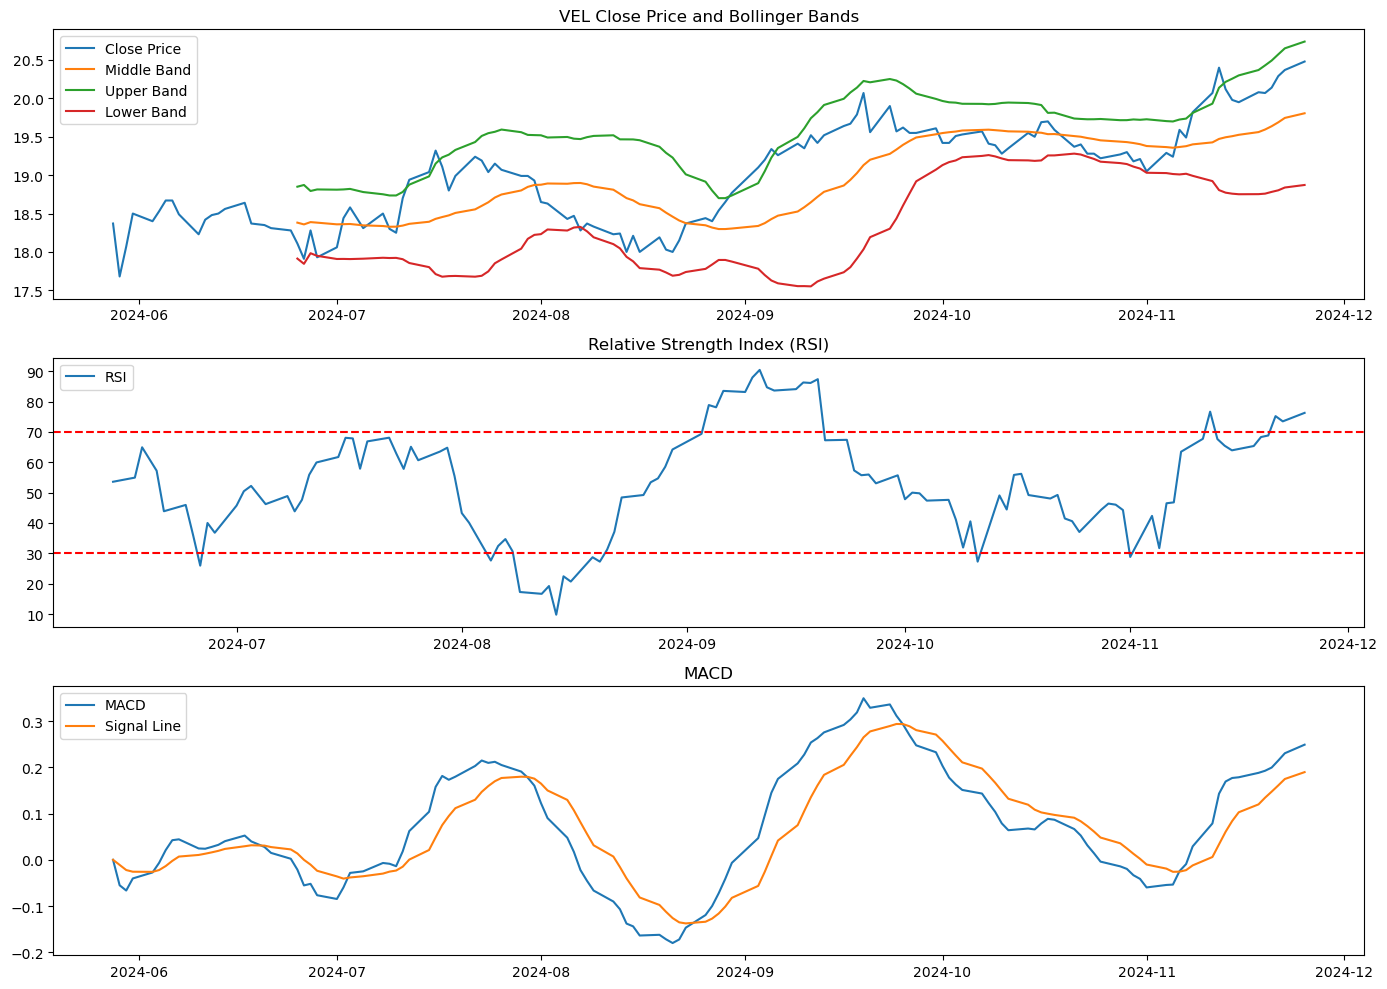

,Ticker,Last Price,RSI,MACD,Signal,Trade Action,Stop Loss,Take Profit,Risk to Reward Ratio
0,VEL,Ticker VEL 20.48 Name: 2024-11-25 00:00:00+...,76.271196,0.248992,0.189647,HOLD,None,None,None


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    rolling_mean = data['Close'].rolling(window).mean()
    rolling_std = data['Close'].rolling(window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return rolling_mean, upper_band, lower_band

def trade_recommendation(ticker):
    
    data = yf.download(ticker, period="6mo", interval="1d")
    
    data['RSI'] = calculate_rsi(data)
    data['MACD'], data['Signal'] = calculate_macd(data)
    data['Middle Band'], data['Upper Band'], data['Lower Band'] = calculate_bollinger_bands(data)
    
    last_close = data['Close'].iloc[-1]
    last_rsi = data['RSI'].iloc[-1]
    last_macd = data['MACD'].iloc[-1]
    last_signal = data['Signal'].iloc[-1]
    
    if last_rsi < 30 and last_macd > last_signal:
        trade_action = "BUY"
        stop_loss = last_close * 0.95
        take_profit = last_close * 1.10
    elif last_rsi > 70 and last_macd < last_signal:
        trade_action = "SELL"
        stop_loss = last_close * 1.05
        take_profit = last_close * 0.90
    else:
        trade_action = "HOLD"
        stop_loss = None
        take_profit = None
    
    risk_reward_ratio = (abs(take_profit - last_close) / abs(last_close - stop_loss)) if stop_loss and take_profit else None
    
    recommendation_df = pd.DataFrame({
        "Ticker": [ticker],
        "Last Price": [last_close],
        "RSI": [last_rsi],
        "MACD": [last_macd],
        "Signal": [last_signal],
        "Trade Action": [trade_action],
        "Stop Loss": [stop_loss],
        "Take Profit": [take_profit],
        "Risk to Reward Ratio": [risk_reward_ratio]
    })

    # Plotting
    plt.figure(figsize=(14, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['Middle Band'], label='Middle Band')
    plt.plot(data['Upper Band'], label='Upper Band')
    plt.plot(data['Lower Band'], label='Lower Band')
    plt.title(f'{ticker} Close Price and Bollinger Bands')
    plt.legend(loc='upper left')

    plt.subplot(3, 1, 2)
    plt.plot(data['RSI'], label='RSI')
    plt.axhline(y=30, color='r', linestyle='--')
    plt.axhline(y=70, color='r', linestyle='--')
    plt.title('Relative Strength Index (RSI)')
    plt.legend(loc='upper left')
    
    plt.subplot(3, 1, 3)
    plt.plot(data['MACD'], label='MACD')
    plt.plot(data['Signal'], label='Signal Line')
    plt.title('MACD')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    return recommendation_df

# Example usage
trade_recommendation_df = trade_recommendation('VEL')
trade_recommendation_df


[*********************100%***********************]  1 of 1 completed


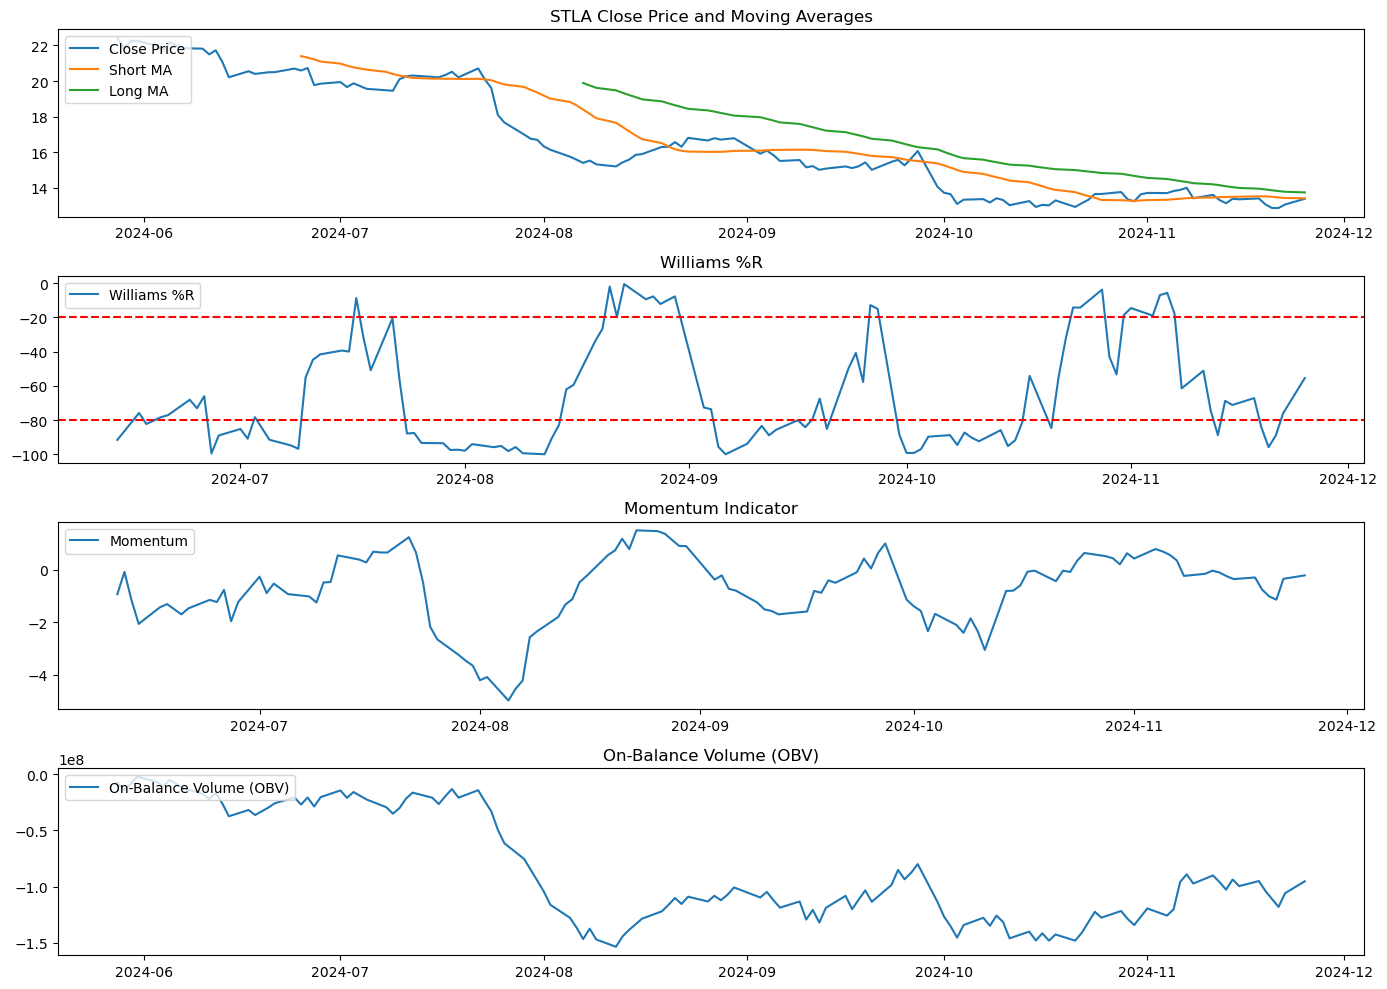

,Ticker,Last Price,Short MA,Long MA,Williams %R,Momentum,OBV,MACD,Signal,Trade Action,Stop Loss,Take Profit,Risk to Reward Ratio
0,STLA,Ticker STLA 13.37 Name: 2024-11-25 00:00:00...,13.3965,13.729,-55.483876,-0.22,-95321000,-0.185477,-0.185146,HOLD,None,None,None


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_moving_averages(data, short_window=20, long_window=50):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    return data

def calculate_williams_r(data, window=14):
    highest_high = data['High'].rolling(window=window).max()
    lowest_low = data['Low'].rolling(window=window).min()
    williams_r = -100 * ((highest_high - data['Close']) / (highest_high - lowest_low))
    return williams_r

def calculate_momentum(data, window=10):
    momentum = data['Close'].diff(window)
    return momentum

def calculate_obv(data):
    obv = (data['Volume'] * ((data['Close'] > data['Close'].shift(1)).astype(int) * 2 - 1)).cumsum()
    return obv

def trade_recommendation(ticker):
    data = yf.download(ticker, period="6mo", interval="1d")
    
    # Calculate indicators
    data = calculate_moving_averages(data)
    data['Williams %R'] = calculate_williams_r(data)
    data['Momentum'] = calculate_momentum(data)
    data['OBV'] = calculate_obv(data)
    data['MACD'], data['Signal'] = calculate_macd(data)
    
    last_close = data['Close'].iloc[-1]
    last_short_ma = data['Short_MA'].iloc[-1]
    last_long_ma = data['Long_MA'].iloc[-1]
    last_williams_r = data['Williams %R'].iloc[-1]
    last_momentum = data['Momentum'].iloc[-1]
    last_obv = data['OBV'].iloc[-1]
    last_macd = data['MACD'].iloc[-1]
    last_signal = data['Signal'].iloc[-1]
    
    # Trade logic
    if last_williams_r < -80 and last_macd > last_signal:
        trade_action = "BUY"
        stop_loss = last_close * 0.95
        take_profit = last_close * 1.10
    elif last_williams_r > -20 and last_macd < last_signal:
        trade_action = "SELL"
        stop_loss = last_close * 1.05
        take_profit = last_close * 0.90
    else:
        trade_action = "HOLD"
        stop_loss = None
        take_profit = None
    
    risk_reward_ratio = (abs(take_profit - last_close) / abs(last_close - stop_loss)) if stop_loss and take_profit else None
    
    recommendation_df = pd.DataFrame({
        "Ticker": [ticker],
        "Last Price": [last_close],
        "Short MA": [last_short_ma],
        "Long MA": [last_long_ma],
        "Williams %R": [last_williams_r],
        "Momentum": [last_momentum],
        "OBV": [last_obv],
        "MACD": [last_macd],
        "Signal": [last_signal],
        "Trade Action": [trade_action],
        "Stop Loss": [stop_loss],
        "Take Profit": [take_profit],
        "Risk to Reward Ratio": [risk_reward_ratio]
    })

    # Plotting
    plt.figure(figsize=(14, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['Short_MA'], label='Short MA')
    plt.plot(data['Long_MA'], label='Long MA')
    plt.title(f'{ticker} Close Price and Moving Averages')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 2)
    plt.plot(data['Williams %R'], label='Williams %R')
    plt.axhline(y=-20, color='r', linestyle='--')
    plt.axhline(y=-80, color='r', linestyle='--')
    plt.title('Williams %R')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 3)
    plt.plot(data['Momentum'], label='Momentum')
    plt.title('Momentum Indicator')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 4)
    plt.plot(data['OBV'], label='On-Balance Volume (OBV)')
    plt.title('On-Balance Volume (OBV)')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    return recommendation_df

# Example usage
trade_recommendation_df = trade_recommendation('STLA')
trade_recommendation_df
